### Read Kv map from Figure 11 in Gregg and Carter (2011)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import scipy.misc as spy

In [2]:
image = spy.imread('Ascension_kv.png')

In [3]:
np.shape(image)

(1156, 1304, 4)

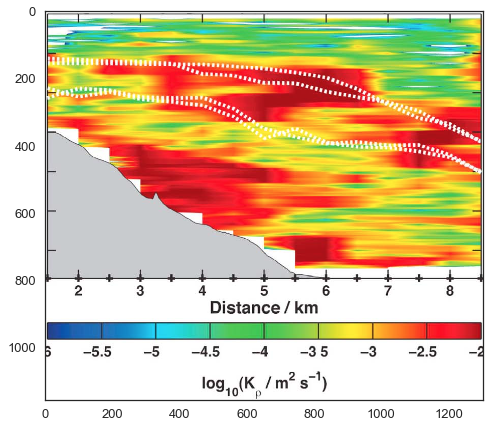

In [4]:
sns.set_style('white')
sns.set_context('talk')

plt.imshow(image)

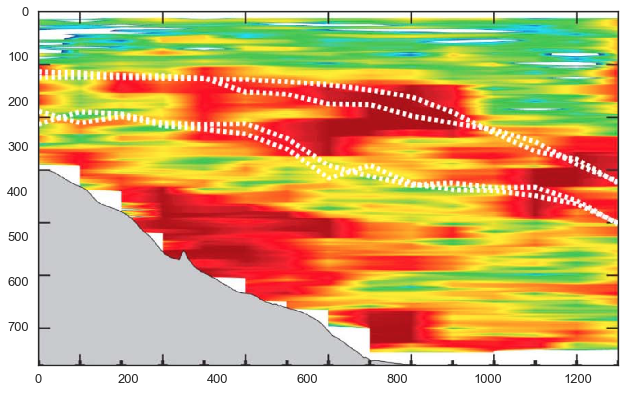

In [64]:
kvmap = image[7:793,6:1297,:]
plt.imshow(kvmap)

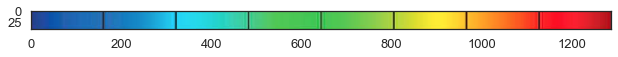

In [76]:
cbar = image[930:970,8:1296,:]
plt.imshow(cbar)

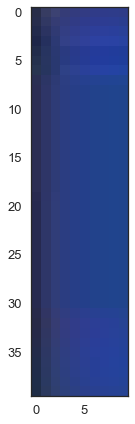

In [77]:
maxCM = cbar[:,0:10,:]
plt.imshow(maxCM)

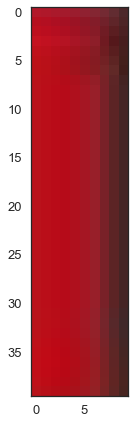

In [72]:
minCM = cbar[:,1280:,:]
plt.imshow(minCM)

### Interpolate pixels into Gregg and Carter's original grid

The original grid has a resolution of 5 m x 0.5 km (vertical and along thalweg). I need to find the conversion pixels to meters in each direction to recreate that grid. I will split the image into cells of Z pixels by X pixels. But first, I need to mask all gray and all white (land and rim lines).

To build that mask i need to ask if red, green AND blue are a certain value ()

How many pixels in 1 "horizontal" km? Lines are about 6 pixels wide. There are about 184$\pm$3 pixels in 1 km

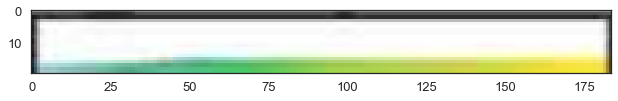

In [164]:
def_1km = kvmap[0:20,93:277,:]
plt.imshow(def_1km)

How many pixels in 100 "vertical" meters? There are 117$\pm$3 pixels per 100 m along the vertical axis.

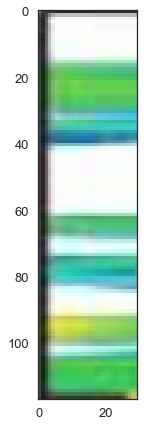

In [165]:
def_100m = kvmap[2:119,0:30,:]
plt.imshow(def_100m)

**Mask everything on the grey scale** 

Greys have all the same values for red, green and blue. So let's mask everything that has r==g and g==b.

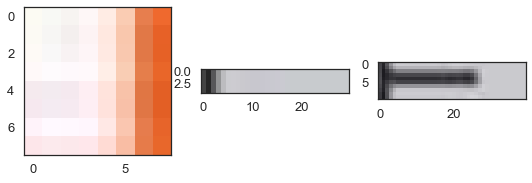

[[[252 251 243 255]
  [248 249 245 255]
  [247 244 241 255]
  [254 247 247 255]
  [255 236 228 255]
  [250 204 179 255]
  [231 126  78 255]
  [239 105  46 255]]

 [[252 250 244 255]
  [247 246 244 255]
  [244 239 238 255]
  [253 243 244 255]
  [255 232 224 255]
  [249 199 173 255]
  [225 120  71 255]
  [231  97  39 255]]

 [[254 250 246 255]
  [249 248 248 255]
  [248 242 243 255]
  [254 245 247 255]
  [255 233 226 255]
  [249 200 175 255]
  [225 120  71 255]
  [230  97  38 255]]

 [[255 249 249 255]
  [254 251 253 255]
  [254 249 252 255]
  [255 249 251 255]
  [255 238 231 255]
  [249 205 180 255]
  [229 126  75 255]
  [233 102  41 255]]

 [[245 234 238 255]
  [243 235 240 255]
  [245 233 239 255]
  [254 238 243 255]
  [255 227 220 255]
  [248 194 169 255]
  [224 118  68 255]
  [227  95  37 255]]

 [[246 232 239 255]
  [244 235 242 255]
  [246 234 241 255]
  [254 238 244 255]
  [255 226 220 255]
  [248 192 168 255]
  [224 118  69 255]
  [227  95  37 255]]

 [[255 243 250 255]
  [255 2

In [151]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(9,3))

white = kvmap[132:140,17:25,:]
grey = kvmap[730:735, 0:30,:]
black = kvmap[700:710, 0:40, :]

ax1.imshow(white)
ax2.imshow(grey)
ax3.imshow(black)

plt.show()

print(white)
#print(grey)
#print(black)

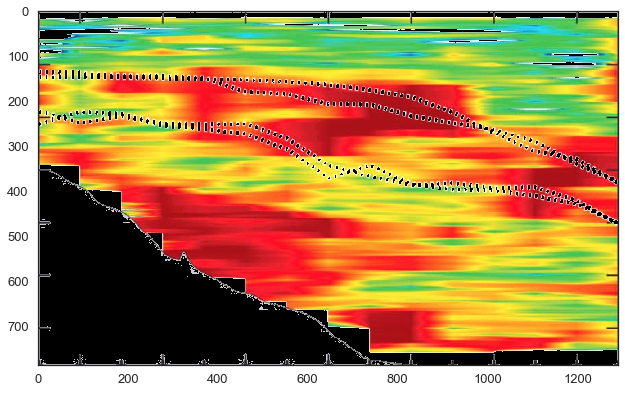

In [156]:
kvmap_masked = np.copy(kvmap)

for ii in range(np.shape(kvmap)[0]):
    for jj in range(np.shape(kvmap)[1]):
        # Mask greys
        if 190<=kvmap_masked[ii,jj,0]<=210 and 190<=kvmap_masked[ii,jj,1]<=210 and 190<=kvmap_masked[ii,jj,2]<=210: 
            kvmap_masked[ii,jj,0:3]=np.nan
        elif kvmap_masked[ii,jj,0]==67 and kvmap_masked[ii,jj,1]==67 and kvmap_masked[ii,jj,2]==67: 
            kvmap_masked[ii,jj,0:3]=np.nan
        elif kvmap_masked[ii,jj,0]==37 and kvmap_masked[ii,jj,1]==37 and kvmap_masked[ii,jj,2]==37: 
            kvmap_masked[ii,jj,0:3]=np.nan
        elif kvmap_masked[ii,jj,0]==87 and kvmap_masked[ii,jj,1]==87 and kvmap_masked[ii,jj,2]==87: 
            kvmap_masked[ii,jj,0:3]=np.nan
        # mask whites
        elif 220<=kvmap_masked[ii,jj,0]<=255 and 220<=kvmap_masked[ii,jj,1]<=255 and 220<=kvmap_masked[ii,jj,2]<=255: 
            kvmap_masked[ii,jj,0:3]=np.nan
        
        else:
            continue
        
plt.imshow(kvmap_masked)
plt.show()


In [166]:
size = np.shape(kvmap_masked)

kvmap_binned = np.empty((int(size[0]/6),int(size[1]/92),4))


In [167]:
(5*117)/100

5.85

In [168]:
np.shape(kvmap_binned)

(131, 14, 4)